### 感知机算法——随机梯度下降

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
### 随机生成分类数列
n = 50 # 样本数
x1 = np.random.randn(n, 2)
x2 = np.random.randn(n, 2) + [5,5]
x = np.vstack((x1,x2))
# 构造y
y1 = np.ones((n,1))
y2 = -np.ones((n,1))
y = np.vstack((y1,y2))

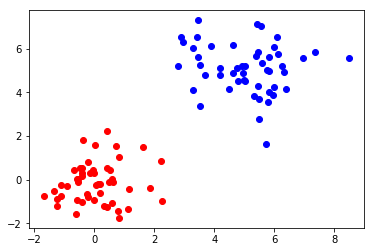

In [24]:
# 画图看一下二者的确是线性可分的
plt.plot(x1[:,0], x1[:,1],"ro")
plt.plot(x2[:,0], x2[:,1],"bo")

In [78]:
# 随机梯度下降法，
def perceptron(x, y ,w, b, learning_rate):
    for i in range(1000):
        dst = (x.dot(w) + b) * y.ravel() 

        # 从结果中选取被错误分类的点
        idx = np.where(dst < 0)[0]
        if len(idx) == 0:
            break
        # 随机选择一个idx
        idx_choice = np.random.choice(idx)

        w = w + learning_rate * y[idx_choice] * x[idx_choice]
        b = b + learning_rate * y[idx_choice]
    return w,b

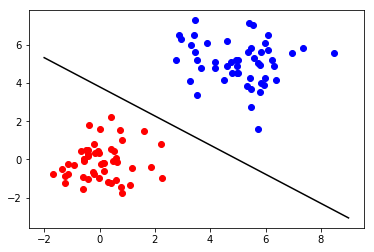

In [88]:
## 迭代并查看迭代效果
# 给定初值
w = np.array([1,1])
b = 0
learning_rate = 0.001
w, b = perceptron(x, y ,w, b, learning_rate)

u = np.linspace(-2, 9 ,100)
v = (-w[0] * u - b)/w[1] # 根据结果区分结果
plt.plot(x1[:,0], x1[:,1],"ro")
plt.plot(x2[:,0], x2[:,1],"bo")
plt.plot(u,v,"k-")

### 感知机问题——对偶问题的求解

In [146]:
### 计算gram矩阵
gram = x.dot(x.T)
### 初始化a = 0
a = np.zeros((2 * n,1))

### gram矩阵的用法
由于
```python
gram = x.dot(x.T)
```
故而gram矩阵的行代表i,列表代表j。如果要取第i和第j个x的内积，应该用`gram[i,j]`来引用

In [148]:
# 从上到下循环列表，确保每一个距离都>0 时才停止。
i = 0
while i < 2*n: 
    # 计算距离
    dst = y[i] * (np.sum((a.ravel() * y.ravel() * gram[i,:])) + np.sum(a * y)) # 计算第i个样本点的距离
    if dst <= 0:
        a[i] = a[i] + learning_rate
        i = 0
        continue
    i += 1

# 从a来计算w和b
w = np.sum(a * y * x, axis = 0)
b = np.sum(a * y)

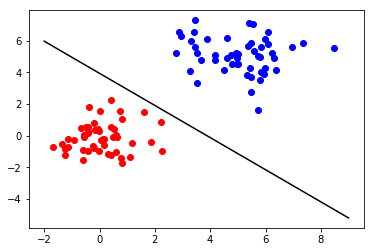

In [145]:
u = np.linspace(-2, 9 ,100)
v = (-w[0] * u - b)/w[1] # 根据结果区分结果
plt.plot(x1[:,0], x1[:,1],"ro")
plt.plot(x2[:,0], x2[:,1],"bo")
plt.plot(u,v,"k-")